# Packages

In [26]:
import pandas as pd
import numpy as np
import itertools
import networkx as nx
import pyvis
import igraph as ig
import matplotlib.pyplot as plt
import plotly.graph_objs as go

# Individuals

## Network preparation

In [4]:
df_individuals = pd.read_csv('_raw/Individuals.csv')

In [5]:
df_articles = pd.read_csv('_raw/Articles.csv')

In [6]:
df_articles

,text,lang
0,EPL Muscles in on El Naya Drug Corridor in Wes...,en
1,Campaign Group Warns of Dangers for Colombia E...,en
2,InSight: Report Tracks How Intra-Cartel Wars E...,en
3,Colombia Cocaine Production Breaks New Record ...,en
4,US Marijuana Vote Unlikely to Impact Mexico in...,en
...,...,...
19935,Presencia de pandillas en Tegucigalpa. La exto...,es
19936,Pandillas callejeras. Las conocidas pandillas ...,es
19937,"Imitadores. Mediante la violencia, la Mara Sal...",es
19938,ABC de la extorsión 3: El modus operandi. Un t...,es


In [7]:
df_individuals

,name,alias_1,alias_2,first_name,family_name
0,Héctor Rusthenford Guerrero Flores,Niño Guerrero,NaN,Héctor Rusthenford,Guerrero Flores
1,Hermágoras González Polanco,Gordito González,NaN,Hermágoras,González Polanco
2,Yeico Masacre,NaN,NaN,Yeico,Masacre
3,Genaro García Luna,NaN,NaN,Genaro,García Luna
4,Gilberto Rodríguez Orejuela,The Chess Player,NaN,Gilberto,Rodríguez Orejuela
...,...,...,...,...,...
86,Miguel Angel Treviño Morales,Z40,NaN,Miguel Angel,Treviño Morales
87,Diego Perez Henao,Diego Rastrojo,NaN,Diego,Perez Henao
88,Luis E. Calle Serna,NaN,NaN,Luis Enrique,Calle Serna
89,Javier Antonio Calle Serna,Comba,NaN,Javier Antonio,Calle Serna


"Úsuga" and "Calle Serna" are duplicated family names (2 copies each). Both the two "Úsuga" and the two "Calle Serna" are brothers. Hence, for them the search term will be the whole name, while for other criminals it will just be the family name.

In [8]:
df_individuals['search_term'] = np.where((df_individuals.family_name=="Úsuga") | (df_individuals.family_name=="Calle Serna"),df_individuals.first_name+' '+df_individuals.family_name,df_individuals.family_name)

Network creation

In [9]:
dict_individuals = dict(zip(df_individuals.name,df_individuals.search_term))

In [10]:
value_combinations = list(itertools.combinations(df_individuals.name.values, 2))
df_connections = pd.DataFrame(value_combinations, columns=['ind_1','ind_2'])
df_connections['weight'] = 0
df_connections.reset_index(drop=True, inplace=True)

In [11]:
df_connections

,ind_1,ind_2,weight
0,Héctor Rusthenford Guerrero Flores,Hermágoras González Polanco,0
1,Héctor Rusthenford Guerrero Flores,Yeico Masacre,0
2,Héctor Rusthenford Guerrero Flores,Genaro García Luna,0
3,Héctor Rusthenford Guerrero Flores,Gilberto Rodríguez Orejuela,0
4,Héctor Rusthenford Guerrero Flores,Jobanis de Jesús Ávila Villadiego,0
...,...,...,...
4090,Diego Perez Henao,Javier Antonio Calle Serna,0
4091,Diego Perez Henao,Guillermo Leon Saenz Vargas,0
4092,Luis E. Calle Serna,Javier Antonio Calle Serna,0
4093,Luis E. Calle Serna,Guillermo Leon Saenz Vargas,0


In [12]:
for article in df_articles.text.values:
    for row in range(len(df_connections)):
        if dict_individuals[df_connections.loc[row,'ind_1']] in article and dict_individuals[df_connections.loc[row,'ind_2']] in article:
            df_connections.loc[row,'weight'] += 1

In [13]:
dict_sizes = {}
for name in df_individuals.name.values:
    dict_sizes[name] = 0
    for article in df_articles.text.values:
        if dict_individuals[name] in article:
            dict_sizes[name] += 1

## Network visualisation

In [14]:
df_connections

,ind_1,ind_2,weight
0,Héctor Rusthenford Guerrero Flores,Hermágoras González Polanco,0
1,Héctor Rusthenford Guerrero Flores,Yeico Masacre,0
2,Héctor Rusthenford Guerrero Flores,Genaro García Luna,0
3,Héctor Rusthenford Guerrero Flores,Gilberto Rodríguez Orejuela,0
4,Héctor Rusthenford Guerrero Flores,Jobanis de Jesús Ávila Villadiego,0
...,...,...,...
4090,Diego Perez Henao,Javier Antonio Calle Serna,14
4091,Diego Perez Henao,Guillermo Leon Saenz Vargas,0
4092,Luis E. Calle Serna,Javier Antonio Calle Serna,16
4093,Luis E. Calle Serna,Guillermo Leon Saenz Vargas,0


## Pyvis

In [15]:
elist = list(zip(df_connections['ind_1'],df_connections['ind_2'],df_connections['weight']))
g = nx.Graph()
g.add_weighted_edges_from([(el[0],el[1],el[2]) for el in elist if el[2]!=0])

In [30]:
nx.write_gexf(g,'_out/networks/individuals.gexf')

In [16]:
nt = pyvis.network.Network('1500px','1500px', bgcolor="#222222", font_color="white") #,select_menu=True,filter_menu=True)
nt.barnes_hut()
nt.from_nx(g) 
nt.toggle_physics(True)

for node in nt.nodes:
    node['font']['size'] = 100
    node['shape'] = 'circularImage'
    node['image'] = f"/Users/federico.bindi/Desktop/GitHub/organized-crime-articles/_aux/pictures/{node['id']}.png"
    node['size'] = dict_sizes[node['id']]

nt.show('_out/networks/individuals.html',notebook=False)

_out/networks/individuals.html


## Igraph

In [23]:
adj_matrix = nx.to_numpy_array(g)
igg = ig.Graph.Adjacency(adj_matrix.tolist())

In [24]:
# To ensure the correct mapping of node indices, set the names of the vertices
igg.vs['name'] = list(g.nodes())

# If the graph is undirected in NetworkX, but not in igraph, convert it to an undirected graph
if not g.is_directed():
    igg.to_undirected()


<Axes: >

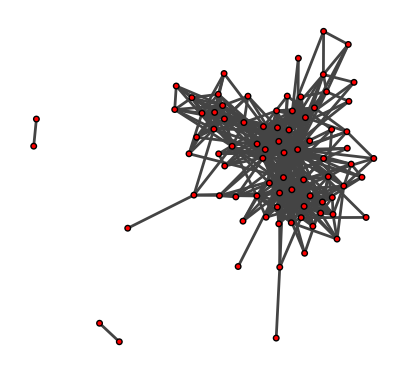

In [25]:
fig, ax = plt.subplots(figsize=(5,5))
ig.plot(
    igg,
    target=ax)

Ugly!

## Plotly

In [27]:
node_positions = nx.spring_layout(g)  # Calculate node positions

node_trace = go.Scatter(
    x=[pos[0] for pos in node_positions.values()],
    y=[pos[1] for pos in node_positions.values()],
    mode='markers',
    # Set other attributes like size, color, etc.
)

edge_trace = go.Scatter(
    x=[],
    y=[],
    line=dict(width=0.5, color='#888'),
    # Set other attributes like opacity, etc.
)

In [28]:
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    # Set layout properties like title, colors, etc.
                ))

In [29]:
fig.show()

Ugly as well!

# Groups

## Network preparation

## Network visualisation